In [30]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('data.csv')

In [32]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [34]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [35]:
#checking null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

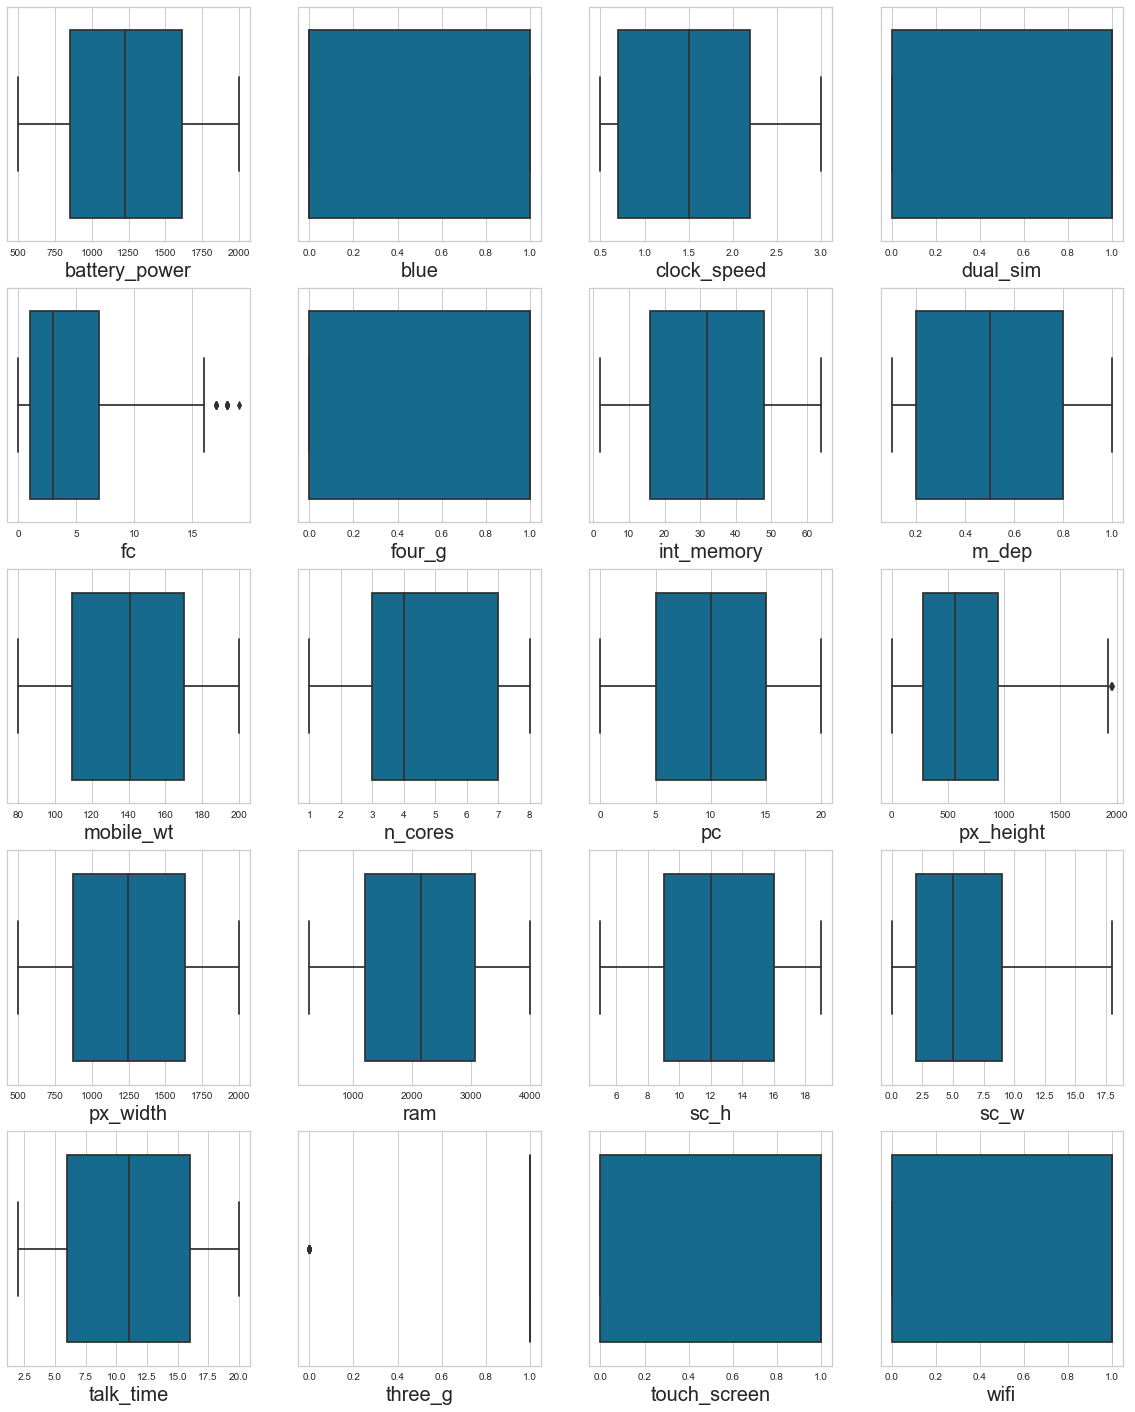

In [36]:
#checking outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :    
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [37]:
x = data.drop(columns = ['price_range']) ## independent variable
y = data['price_range'] ## Dependent or target variable

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train1 = std_scaler.fit_transform(x_train)  
x_test1 = std_scaler.transform(x_test)  

In [40]:
corr = data.corr()

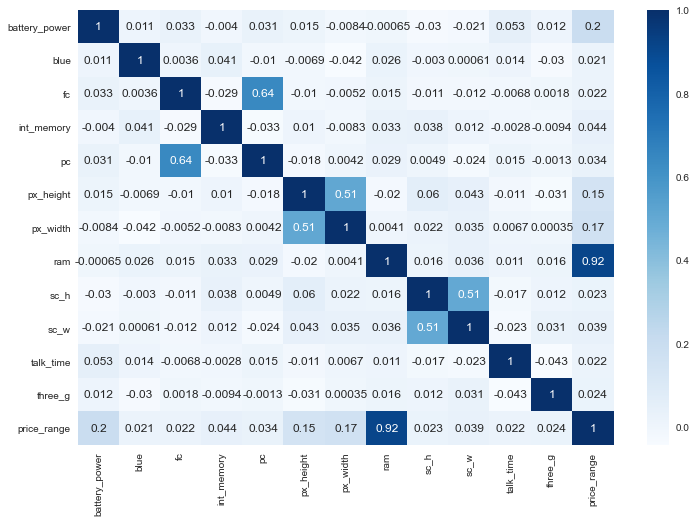

In [41]:
#Getting Important features.
top_feature = corr.index[abs(corr['price_range']>0.02)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True,cmap='Greens')
plt.show()

In [42]:
# Outleir treatment in px_height using IQR method
Q1= data.px_height.quantile(0.25)
Q3= data.px_height.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_limit,upper_limit

(-714.0, 1944.0)

In [43]:
data=data[(data.px_height<upper_limit) & (data.px_height>lower_limit)]
data.shape

(1998, 21)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


<AxesSubplot:>

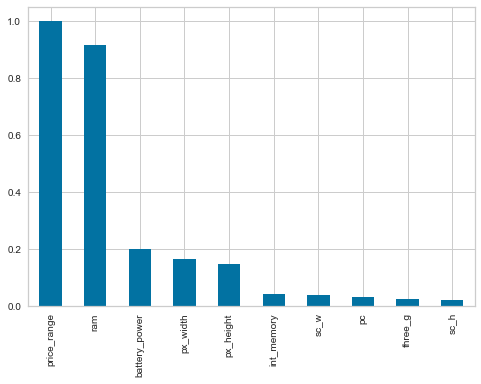

In [44]:

feat_importance = corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)
print(feat_importance)
feat_importance.nlargest(10).plot(kind='bar')

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_new,y_train)

LogisticRegression()

In [48]:
y_pred1 = lr.predict(x_new_test)

In [49]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        92
           1       0.12      0.05      0.07        96
           2       0.00      0.00      0.00       106
           3       0.30      1.00      0.47       106

    accuracy                           0.28       400
   macro avg       0.36      0.27      0.15       400
weighted avg       0.34      0.28      0.16       400



# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_new , y_train)


KNeighborsClassifier(n_neighbors=4)

In [51]:
y_pred2 = knn.predict(x_new_test)

In [52]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        92
           1       0.87      0.94      0.90        96
           2       0.83      0.86      0.84       106
           3       0.97      0.83      0.89       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



# SVC

In [53]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_new,y_train)
y_pred3 = svc.predict(x_new_test)

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_new,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  13.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   5.3s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   4.1s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=  10.5s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.6s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [55]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [56]:
grid_pred = grid.predict(x_new_test)

In [57]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        92
           1       0.85      0.89      0.87        96
           2       0.88      0.79      0.84       106
           3       0.84      1.00      0.91       106

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.89       400
weighted avg       0.89      0.89      0.88       400



# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_new, y_train)

DecisionTreeClassifier()

In [59]:
y_pred3 = dtc.predict(x_new_test)

In [60]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        92
           1       0.80      0.88      0.84        96
           2       0.86      0.75      0.80       106
           3       0.88      0.93      0.90       106

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.86       400



# XGBoost

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_new, y_train)

[16:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred4 = xgb.predict(x_new_test)

In [63]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        92
           1       0.83      0.94      0.88        96
           2       0.90      0.83      0.86       106
           3       0.92      0.94      0.93       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



# Random Forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_new, y_train)

RandomForestClassifier()

In [65]:
y_pred5 = rf.predict(x_new_test)

In [66]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        92
           1       0.79      0.89      0.84        96
           2       0.88      0.76      0.82       106
           3       0.88      0.93      0.91       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



# Conclusion: From Xgboost we are getting highest accuracy with better performance so, we will select Xgboost as our final model